In [1]:
# import modules
import pandas as pd
import tweepy
 
# function to display data of each tweet
def printtweetdata(n, ith_tweet):
        print()
        print(f"Tweet {n}:")
        print(f"Username:{ith_tweet[0]}")
        print(f"Description:{ith_tweet[1]}")
        print(f"Location:{ith_tweet[2]}")
        print(f"Tweet Text:{ith_tweet[3]}")
        print(f"Hashtags Used:{ith_tweet[4]}")
 
 
# function to perform data extraction
def scrape(words, date_since, numtweet):
 
        # Creating DataFrame using pandas 
        db = pd.DataFrame(columns=['username',
                                   'description',
                                   'location',
                                   'text',
                                   'hashtags'])
 
        # We are using .Cursor() to search through twitter for the required tweets.
        tweets = tweepy.Cursor(api.search_tweets,
                               words, lang="en",
                               since_id=date_since,
                               tweet_mode='extended').items(numtweet)
 
 
        # Storing Tweets in list 
        list_tweets = [tweet for tweet in tweets]
 
        # Counter to maintain Tweet Count
        i = 1
 
        # Iterate over each list for extracting information about each tweet
        for tweet in list_tweets:
                username = tweet.user.screen_name
                description = tweet.user.description
                location = tweet.user.location
                hashtags = tweet.entities['hashtags']
 
                try:
                        text = tweet.retweeted_status.full_text
                except AttributeError:
                        text = tweet.full_text
                hashtext = list()
                for j in range(0, len(hashtags)):
                        hashtext.append(hashtags[j]['text'])
 
                # Here we are appending all the extracted information in the DataFrame
                ith_tweet = [username, description,
                             location, text, hashtext]
                db.loc[len(db)] = ith_tweet
 
                # Function call to print tweet data on screen
                printtweetdata(i, ith_tweet)
                i = i+1
        filename = 'E_Learning_tweets.csv'
 
        # we will save our database as a CSV file.
        db.to_csv(filename)
        
        return db
 
if __name__ == '__main__':
    
        # Giving tokens to get access o the Twitter
        access_token="XXXXXXX"
        access_token_secret="XXXXXXX"
        consumer_key="XXXXXXXF"
        consumer_secret="XXXXXXX"
        auth= tweepy.OAuthHandler(consumer_key,consumer_secret)
        auth.set_access_token(access_token,access_token_secret)
 
        api = tweepy.API(auth)
    
        # Specifying the hash word to search
        words=['#elearning','#onlinelearning']
        date_since='2022-01-01'
 
        # number of tweets you want to extract in one run
        numtweet = 100
        data=scrape(words, date_since, numtweet)
        print('Scraping has completed!')


Tweet 1:
Username:jnsuvo
Description:Hi, I am Shuvo. Full Time Freelancer. Professional Graphics Designer and Social Media Marketing Expert!
Anybody need my services, please contract me. Thank you!
Location:Los Angeles, CA
Tweet Text:Vibe Academy is offering Online Classes with live instructors for children from 3 to 6 years old!

Starts June 27th and runs until August 5th 2022 at https://t.co/Rk0PmFTvh7! Sign up today - just $150 for 6 weeks of learning and fun!

#elearning #education #onlinelearning https://t.co/CA8TwjQrzO
Hashtags Used:[]

Tweet 2:
Username:educationbnb
Description:By Doctor @KrittanawongMD. The leaderboard of #education3.0 lovers. Our mission: Establish education 3.0 Twitter community
Location:
Tweet Text:Make Your Own Online Courses https://t.co/K1bfwkeORG #onlinecourse #onlinelearning #onlinecourses #education #elearning #online #onlineclass #learning #onlineclasses #onlinetraining #course #training #dirumahaja #learnonline #kursusonline #learn #entrepreneur #st

In [2]:
# Getting Head of Dataframe
data.head(10)

,username,description,location,text,hashtags
0,jnsuvo,"Hi, I am Shuvo. Full Time Freelancer. Professi...","Los Angeles, CA",Vibe Academy is offering Online Classes with l...,[]
1,educationbnb,By Doctor @KrittanawongMD. The leaderboard of ...,,Make Your Own Online Courses https://t.co/K1bf...,"[onlinecourse, onlinelearning, onlinecourses, ..."
2,AedinInsight,Digital Marketing Manager @aedinInsight\nConne...,"Albuquerque, New Mexico",Make Your Own Online Courses https://t.co/K1bf...,"[onlinecourse, onlinelearning, onlinecourses, ..."
3,vasanrt,I am a #bot🤖 and I retweet #motivation and per...,,#Knowledge become Power only when we put it in...,[Knowledge]
4,Global_Link_Edu,Global Link Education is the online interactiv...,,#Knowledge become Power only when we put it in...,"[Knowledge, GlobalLinkEducation, educational, ..."
5,educationbnb,By Doctor @KrittanawongMD. The leaderboard of ...,,SmartHead - Tutoring Service &amp; Online Scho...,[ancorathemes]
6,stylelibreview,"50,000 WordPress Themes & Website Templates Fr...","Ukraine, Kiev",SmartHead - Tutoring Service &amp; Online Scho...,"[ancorathemes, appointments, classes, elearnin..."
7,AedinInsight,Digital Marketing Manager @aedinInsight\nConne...,"Albuquerque, New Mexico",Make Your Own Online Courses https://t.co/K1bf...,"[onlinecourse, onlinelearning, onlinecourses, ..."
8,AnirudhPrakhya,,,🔥 Click below link to buy Books and EDUCBA Cou...,"[vedicastrology, educba, learnfromhome, learni..."
9,DistanceLrnBot,Follow this account to get Tweets with hashtag...,San Diego,Complete your pending application.\nAdmission ...,[]


In [3]:
import re

In [4]:
# Finction to remove URLs from the Tweet
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [5]:
nourl_data=[remove_url(tweet) for tweet in data['text']]

In [6]:
nourl_data[1]

'Make Your Own Online Courses onlinecourse onlinelearning onlinecourses education elearning online onlineclass learning onlineclasses onlinetraining course training dirumahaja learnonline kursusonline learn entrepreneur stayhome COURSES'

In [7]:
# Converting all tweets to lowercase
low_data=[tweet.lower().split() for tweet in nourl_data]

In [8]:
low_data[:2]

[['vibe',
  'academy',
  'is',
  'offering',
  'online',
  'classes',
  'with',
  'live',
  'instructors',
  'for',
  'children',
  'from',
  '3',
  'to',
  '6',
  'years',
  'oldstarts',
  'june',
  '27th',
  'and',
  'runs',
  'until',
  'august',
  '5th',
  '2022',
  'at',
  'sign',
  'up',
  'today',
  'just',
  '150',
  'for',
  '6',
  'weeks',
  'of',
  'learning',
  'and',
  'funelearning',
  'education',
  'onlinelearning'],
 ['make',
  'your',
  'own',
  'online',
  'courses',
  'onlinecourse',
  'onlinelearning',
  'onlinecourses',
  'education',
  'elearning',
  'online',
  'onlineclass',
  'learning',
  'onlineclasses',
  'onlinetraining',
  'course',
  'training',
  'dirumahaja',
  'learnonline',
  'kursusonline',
  'learn',
  'entrepreneur',
  'stayhome',
  'courses']]

In [9]:
# Importing stopwords from nltk library
import nltk
from nltk.corpus import stopwords

In [10]:
# Storing stop words in a list
stopwords=stopwords.words('english')

In [11]:
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [12]:
# Removing stopwords from the tweets
for tweet in low_data:
    for word in tweet:
        if word in stopwords:
            tweet.remove(word)

In [13]:
low_data[3]

['knowledge',
 'become',
 'power',
 'when',
 'put',
 'into',
 'use',
 'get',
 'best',
 'online',
 'education',
 'increase',
 'knowledge',
 'every',
 'field',
 'becoming',
 'part',
 'globallinkeducationeducational',
 'onlinelearning',
 'elearning',
 'success',
 'more',
 'details',
 'visit',
 'website']

In [14]:
# Storing all words of the tweets into a list
all_words=[]
for tweet in low_data:
    for word in tweet:
        all_words.append(word)

In [15]:
all_words[:10]

['vibe',
 'academy',
 'offering',
 'online',
 'classes',
 'live',
 'instructors',
 'children',
 '3',
 '6']

In [16]:
import collections

In [17]:
# Importing Counter from collections library
word_count=collections.Counter(all_words)

In [18]:
max_count_words=word_count.most_common(10)

In [19]:
max_count_words

[('elearning', 104),
 ('onlinelearning', 96),
 ('online', 82),
 ('courses', 68),
 ('education', 65),
 ('learning', 56),
 ('course', 52),
 ('onlinecourses', 44),
 ('learn', 41),
 ('training', 39)]

In [20]:
x=[]
y=[]
for d in max_count_words:
    x.append(d[0])
    y.append(d[1])

In [21]:
x

['elearning',
 'onlinelearning',
 'online',
 'courses',
 'education',
 'learning',
 'course',
 'onlinecourses',
 'learn',
 'training']

In [22]:
y

[104, 96, 82, 68, 65, 56, 52, 44, 41, 39]

In [23]:
# Importing matplotlib to get the plots
import matplotlib.pyplot as plt

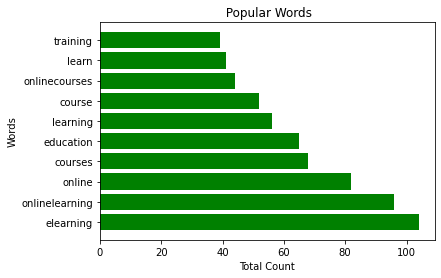

In [24]:
plt.barh(x,y,color='green')
plt.xlabel("Total Count")
plt.ylabel("Words")
plt.title(" Popular Words")
plt.show()

In [25]:
hash_tags=[tweet for tweet in data['hashtags']]

In [26]:
# Storing all words of the tweets into a list
all_hashtag=[]
for tweet in hash_tags:
    for hashtag in tweet:
        all_hashtag.append(hashtag)

In [27]:
all_hashtag[:5]

['onlinecourse', 'onlinelearning', 'onlinecourses', 'education', 'elearning']

In [28]:
# Importing Counter from collections library
hash_count=collections.Counter(all_hashtag)
max_count_hash=hash_count.most_common(10)

In [29]:
max_count_hash

[('elearning', 74),
 ('onlinelearning', 70),
 ('education', 46),
 ('onlinecourses', 40),
 ('onlinecourse', 36),
 ('learning', 29),
 ('online', 27),
 ('training', 26),
 ('onlineclass', 25),
 ('onlineclasses', 25)]

In [30]:
x1=[]
y1=[]
for d in max_count_words:
    x1.append(d[0])
    y1.append(d[1])

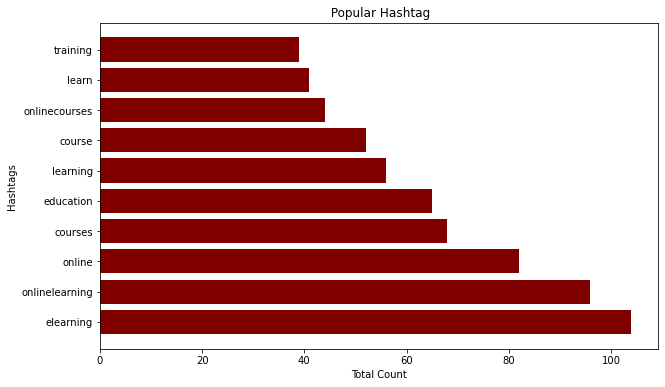

In [31]:
# Ploting Bar graph with max_count_hash
plt.figure(figsize=(10,6))
plt.barh(x1,y1,color='maroon')
plt.xlabel("Total Count")
plt.ylabel("Hashtags")
plt.title(" Popular Hashtag")
plt.show()